<a href="https://colab.research.google.com/github/AliyevaO/sales_predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##Sales predictions Project
* Oleksandra Aliyeva 
* 17.02.2022




The project is a sales prediction for food items sold at various stores. 

Data Dictionary for this dataset:

* **Item_Identifier**	- Unique product ID
* **Item_Weight**	- Weight of product
* **Item_Fat_Content** - Whether the product is low fat or regular
* **Item_Visibility** -	The percentage of total display area of all products in a store allocated to the particular product
* **Item_Type**	- The category to which the product belongs
* **Item_MRP** -	Maximum Retail Price (list price) of the product
* **Outlet_Identifier**	- Unique store ID
* **Outlet_Establishment_Year**	- The year in which store was established
* **Outlet_Size**	- The size of the store in terms of ground area covered
* **Outlet_Location_Type** -	The type of area in which the store is located
* **Outlet_Type** -	Whether the outlet is a grocery store or some sort of supermarket
* **Item_Outlet_Sales**	- Sales of the product in the particular store. This is the target variable to be predicted.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = '/content/drive/MyDrive/Bootcamp/01 Week_ Python/sales_predictions.csv'

In [4]:
#check a head of a DataFrame
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#check how many rows and columns are in a DataFrame
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_predictions.shape

(8523, 12)

##Cleaning Data

In [7]:
#check for duplicates
sales_predictions.duplicated().sum()

0

In [8]:
#check for missing values and columns in which we have it
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#fill missing rows in Column 'Outlet_Size' with 'Missing', best way in my opinion to do it without loosing much data.
outlet_size_missing = sales_predictions['Outlet_Size'].fillna('Missing')

In [10]:
sales_predictions['Outlet_Size'].fillna(value=outlet_size_missing, inplace=True)

In [11]:
#fill missing rows in Column 'Item_Weight' using already known weight of the same item from another rows.
sales_predictions['Item_Weight'] = sales_predictions.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(np.mean(x)))

In [12]:
sales_predictions[sales_predictions.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [13]:
#still have 4 missing values, I fill them with mean value of the column 'Item_Weight'
mean_value = sales_predictions['Item_Weight'].mean()
sales_predictions['Item_Weight'].fillna(value=mean_value, inplace=True)

In [14]:
#checking if there is any missing data left
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
#check the types of data
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [16]:
#loop through data types to get only ones with object type
data_types = sales_predictions.dtypes
obj_cols = data_types[ data_types=='object'].index
obj_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [17]:
#look for inconsistent categories
for col in obj_cols:
    print(f'- {col}:')
    print(sales_predictions[col].value_counts(dropna=False))
    print("\n************")

- Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

************
- Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

************
- Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

************
- Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045

In [18]:
#rename inconsistent categories
repl_map ={'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(repl_map)
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Data Analysis and Visualization


In [19]:
#obtain the summary statistics of each numerical columns 
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875420,0.066132,140.992782,1997.831867,2181.288914
std,4.645008,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
#check for correlation in data
corr = sales_predictions.corr()

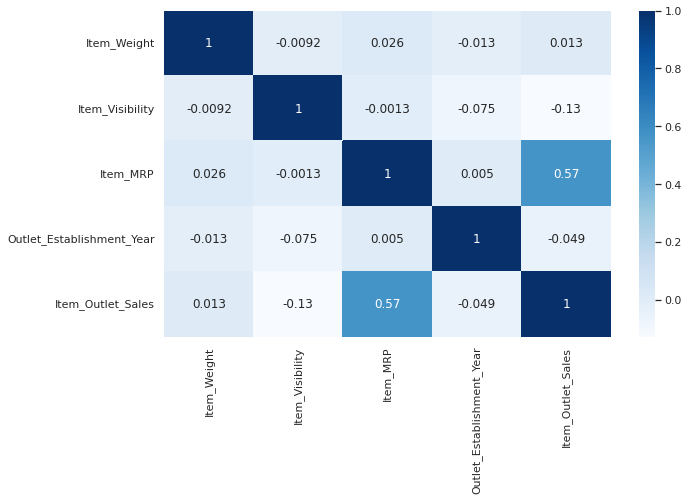

In [21]:
#use heatmap to see a correlation between features
sns.set(rc={"figure.figsize":(10, 6)})
sns.heatmap(corr, cmap = 'Blues', annot = True);

* In heatmap we did not identify relationships between variables in our dataset. Except two columns that have a moderate correlations, they are Maximum Retail Price of the product (Item_MRP) and Sales of the product in the particular store(Item_Outlet_Sales). 

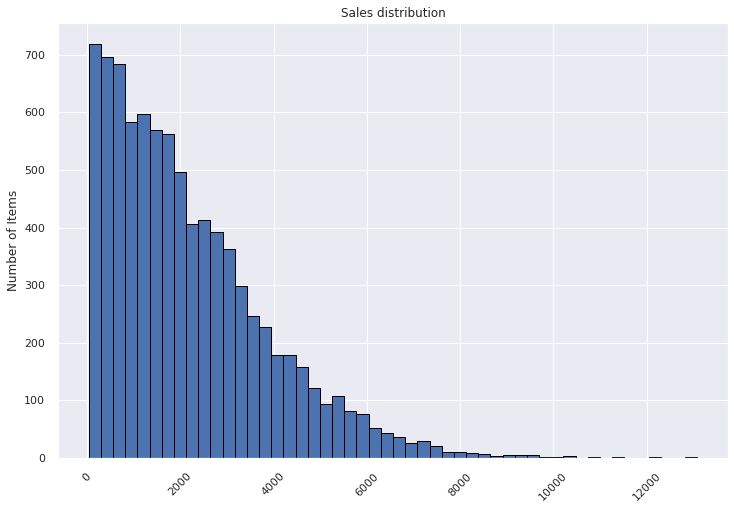

In [22]:
#plot sales of the product in the particular store
plt.style.use('seaborn')
sns.set(rc={"figure.figsize":(12, 8)})
sales_predictions['Item_Outlet_Sales'].hist(bins = 50, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.ylabel('Number of Items');
plt.title('Sales distribution');

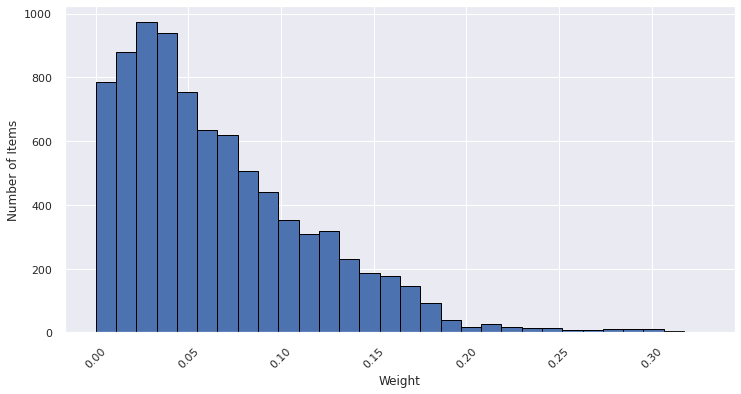

In [23]:
#plot a distribution of the percentage of total display area of all products
sales_predictions['Item_Visibility'].hist(bins = 30, edgecolor='black', figsize=(12,6))
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Weight')
plt.ylabel('Number of Items');

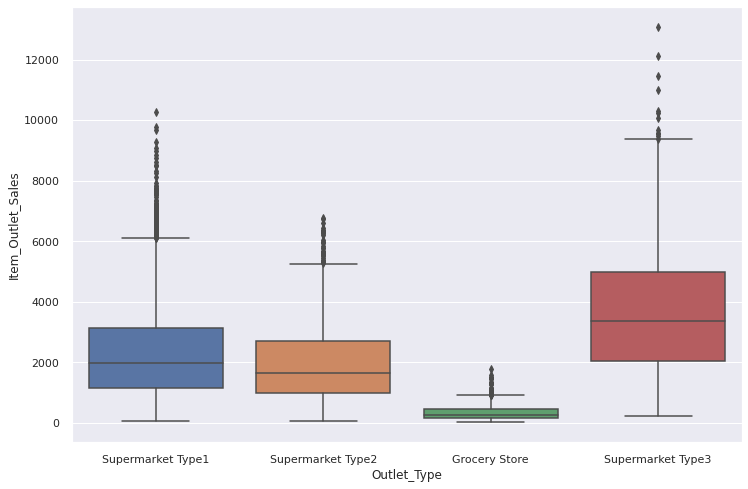

In [24]:
#plot a boxplot to see the difference in item sales depending on outlet type
sns.set(rc={"figure.figsize":(12, 8)})
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data = sales_predictions);

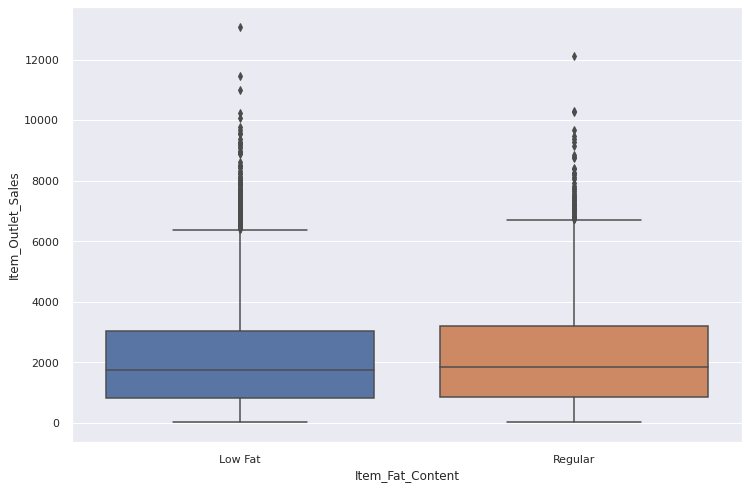

In [25]:
#plot a boxplot to see the difference in item sales depending on whether the product is low fat or regular
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data = sales_predictions);

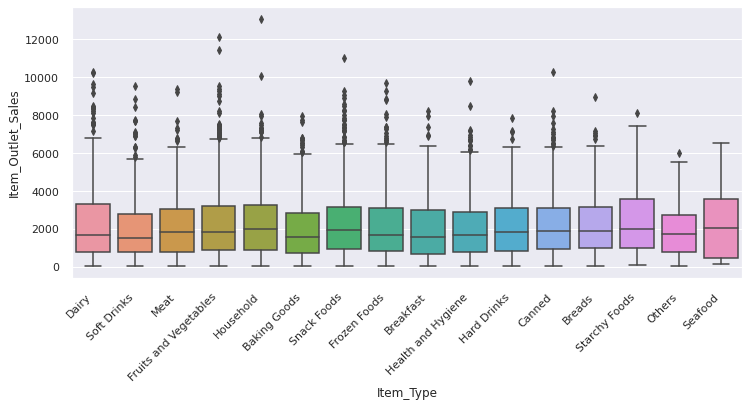

In [26]:
#plot a boxplot to see the difference in item sales depending on the category to which the product belongs
sns.set(rc={"figure.figsize":(12, 5)})
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data = sales_predictions,)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

## Visualization for stake holders

In [27]:
#used a code from https://www.statology.org/seaborn-barplot-show-values/, to show values on barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

* **Is there any connection beetween Sales of products and Type of the Outlet?**

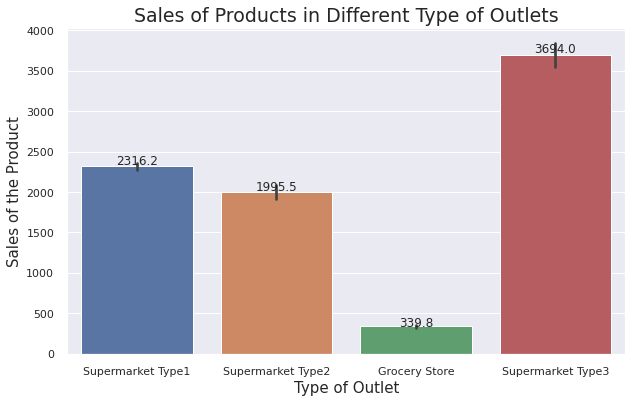

In [28]:
sns.set(rc={"figure.figsize":(10,6)})
ax = sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data = sales_predictions)
ax.set_xlabel('Type of Outlet', fontsize=15)
ax.set_ylabel('Sales of the Product', fontsize=15)
ax.set_title('Sales of Products in Different Type of Outlets', fontsize=19)
show_values(ax)
plt.savefig('Sales of Products in Different Type of Outlets.png', dpi = 300);

* We can see that the highest sales has Supermarket Type 3.

**Is there any connection between Outlet Type, Outlet Location and Sales?**

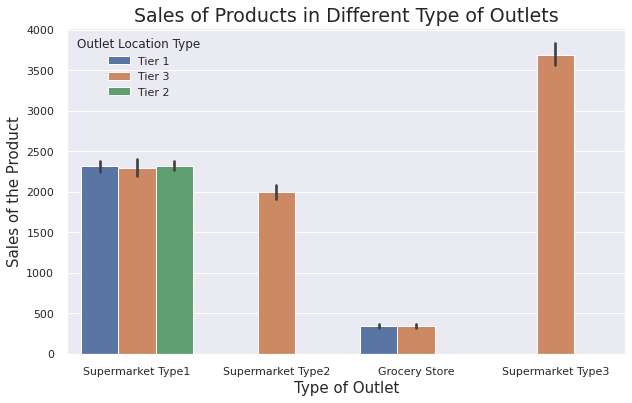

In [29]:
sns.set(rc={"figure.figsize":(10,6)})
ax = sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data = sales_predictions, hue='Outlet_Location_Type')
ax.set_xlabel('Type of Outlet', fontsize=15)
ax.set_ylabel('Sales of the Product', fontsize=15)
ax.set_title('Sales of Products in Different Type of Outlets', fontsize=19)
ax.legend(title='Outlet Location Type');

* Yes, we can see that Supermarket Type 3 Located in Tier 3 has the highest sales.

In [30]:
# check number of stores in different locations
sales_predictions['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [31]:
# check number of stores of different types
sales_predictions['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [32]:
# check number of stores with different identifiers
sales_predictions['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [33]:
#using groupby to sort values in columns Item_Type and Item_Visibility and find mean values
visibility_by_type = sales_predictions.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending=False)

* **What relationship is between Product Category and Product Visibility?**




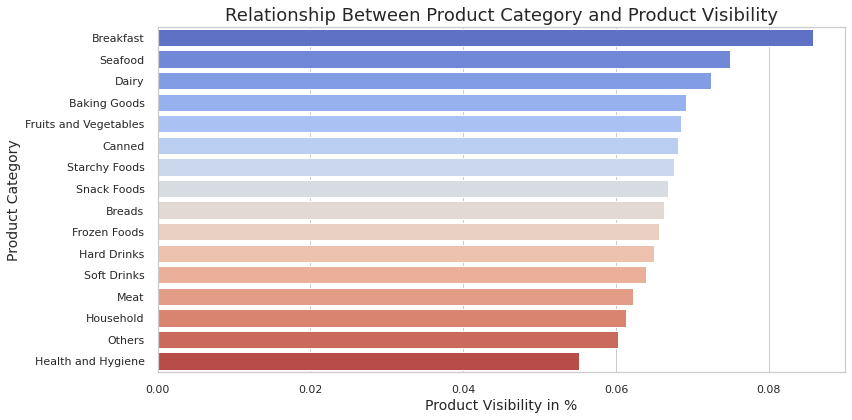

In [34]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(figsize=(12, 6))

sns.set_color_codes("pastel")
sns.barplot(y=visibility_by_type.index, x=visibility_by_type.values, palette='coolwarm')
plt.xlabel('Product Visibility in %',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.title('Relationship Between Product Category and Product Visibility',fontsize=18)
fig.tight_layout()
plt.savefig('Relationship Between Product Category and Product Visibility.png', dpi = 300);

* In graph we see that most visibility get products  from sections: Breakfast, Seafood, Dairy, Baking Goods, Fruits and Vegetables. Average visibility of all categories is between 0.06 and 0.07.

* **What relationship is between Product Category and Sales?**

In [35]:
#use groupby to sort values in columns Item_Type and Item_Outlet_Sales
sales_by_type = sales_predictions.groupby('Item_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)

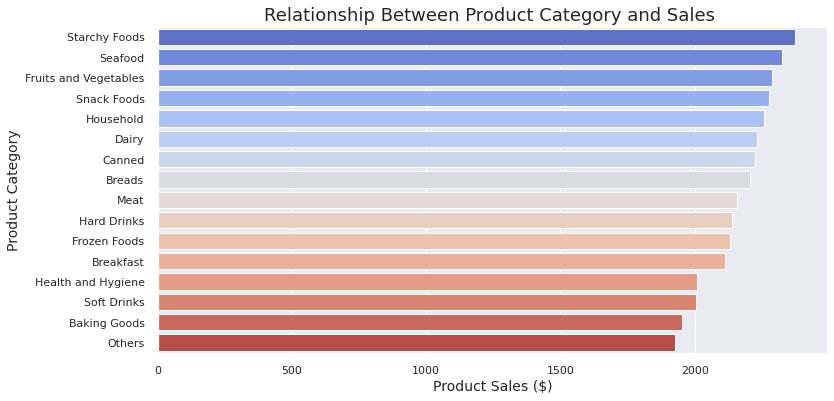

In [36]:
sns.set(rc={"figure.figsize":(12,6)})
ax = sns.barplot(y=sales_by_type.index, x=sales_by_type.values, color="blue", palette='coolwarm',orient='horizontal')
plt.xlabel('Product Sales ($)',fontsize=14)
plt.ylabel('Product Category',fontsize=14)
plt.title('Relationship Between Product Category and Sales ',fontsize=18);

* If compare with a plot above, we can tell that there is no direct connection between Product Category, Product Visibility and Sales.

* **Is there any relationship between Product Category, Product Visibility and Number of Products in Different Categories?**

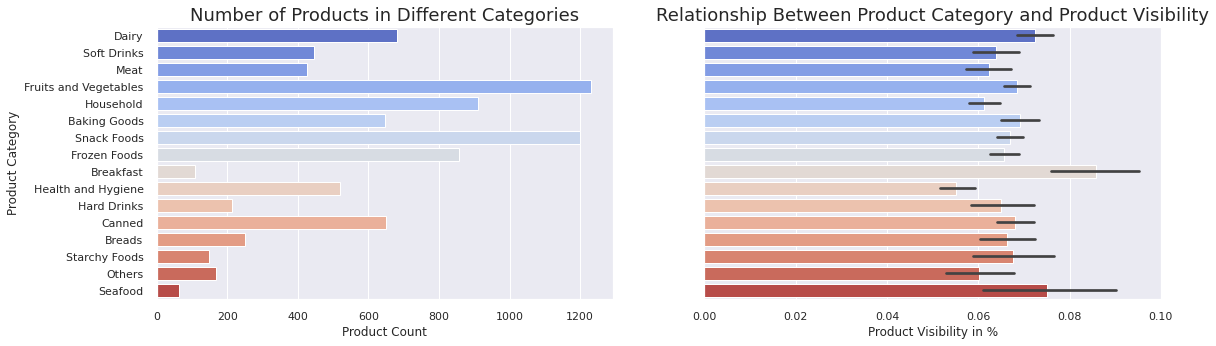

In [37]:
#making two plots in one figure
fig, axes = plt.subplots(ncols=2, figsize=(18, 5),sharey=True)
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

ax=sns.countplot(y='Item_Type', data=sales_predictions, orient='h',palette='coolwarm', ax=axes[0])
ax.set_xlabel('Product Count')
ax.set_ylabel('Product Category')
ax.set_title('Number of Products in Different Categories',fontsize=18)

ax1=sns.barplot(x='Item_Visibility', y='Item_Type',data=sales_predictions, orient='h',palette='coolwarm',ax=axes[1])
ax1.set_xlabel('Product Visibility in %')
ax1.set_ylabel(' ')
ax1.set_title('Relationship Between Product Category and Product Visibility',fontsize=18);

* We see that there is no connection between number of products in a category and visibility of this product. Two categories that have the highest visibility, have the smallest number of products represented.


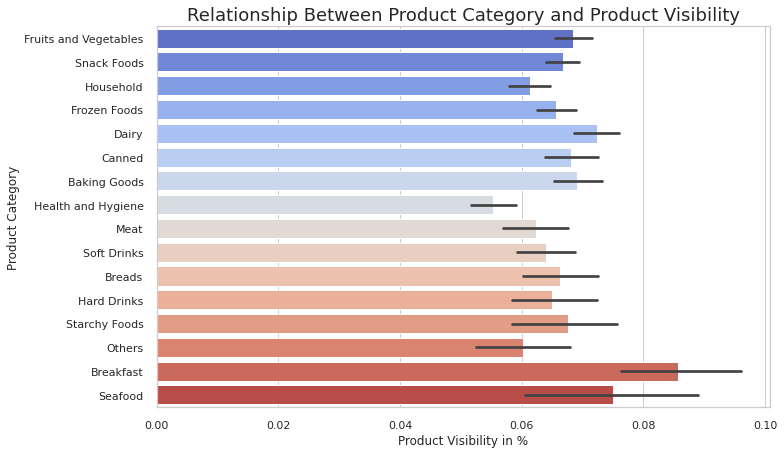

In [38]:
#plot the product visibility by product category without sorting
plt.figure(figsize=(11,7))
ax1=sns.barplot(x='Item_Visibility', y='Item_Type',data=sales_predictions, orient='h',palette='coolwarm', 
                order=["Fruits and Vegetables","Snack Foods","Household","Frozen Foods","Dairy",
                       "Canned","Baking Goods","Health and Hygiene","Meat","Soft Drinks","Breads",
                       "Hard Drinks","Starchy Foods","Others","Breakfast","Seafood"])
ax1.set_xlabel('Product Visibility in %')
ax1.set_ylabel('Product Category')
ax1.set_title('Relationship Between Product Category and Product Visibility',fontsize=18)
plt.savefig('Relationship Between Product Category and Product Visibility.png', dpi = 300, bbox_inches='tight');

**What is a difference in a destribution of products sale by fat content?**

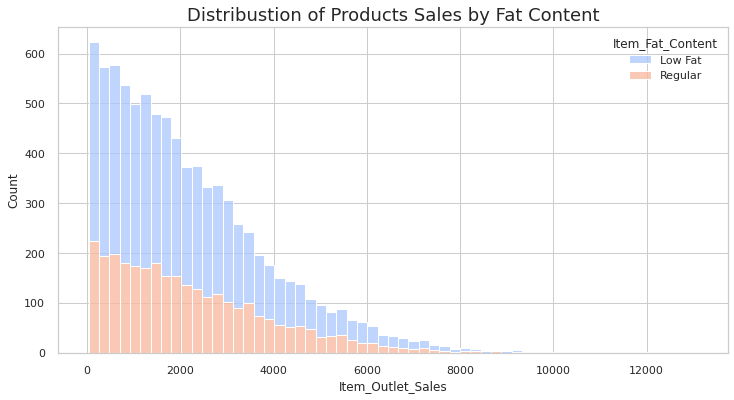

In [39]:
#3#sns.set(rc={"figure.figsize":(12,6)})
sns.histplot(data=sales_predictions, x='Item_Outlet_Sales', hue='Item_Fat_Content', palette='coolwarm', multiple="stack")
plt.title('Distribustion of Products Sales by Fat Content', fontsize=18);

* Both categories have exponential sales distribution.

In [40]:
#make a function to transfer values on plots
def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x:,.0f}"

In [41]:
import matplotlib as mpl
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
price_fmt_100k = FuncFormatter(hundred_k)

* **What types of products have the most cumulative sales?**




In [42]:
# make function to convert plot values in easy to read format
from matplotlib.ticker import FuncFormatter

def hundred_k(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f'${x:,.0f}'

# Create the formatter
price_fmt_mill=FuncFormatter(hundred_k)

## Set the axis' major formatter
ax.xaxis.set_major_formatter(price_fmt_mill)

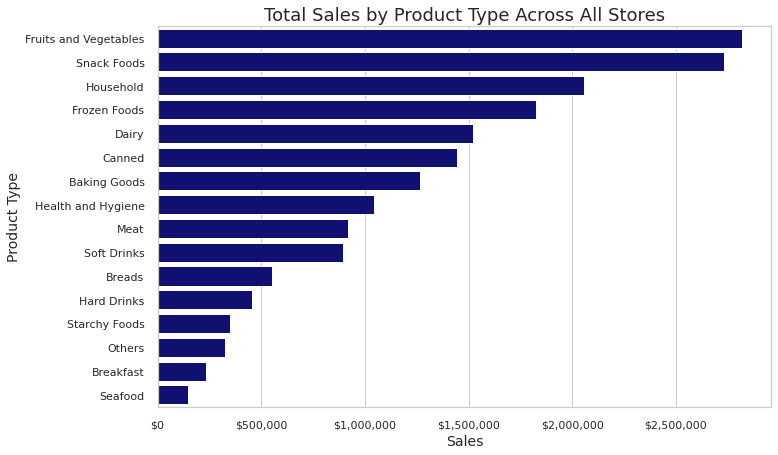

In [43]:
plt.figure(figsize=(11,7))
cum_sum_by_type = sales_predictions.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_by_type['Item_Type'].sort_index(), x = cum_sum_by_type['Sales By Product Type'], orient='h',color='navy');
ax.set_title('Total Sales by Product Type Across All Stores', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k)
fig.tight_layout()
plt.savefig('Total Sales by Product Type Across All Stores.png', dpi = 300);

* Top 3 categories are Fruits and Vegetables, Snack Foods and Household. 

In [44]:
#make filters to see total sales in different Outlet Types
sale_sup1 = sales_predictions[(sales_predictions['Outlet_Type']=='Supermarket Type1')]
sale_sup2 = sales_predictions[(sales_predictions['Outlet_Type']=='Supermarket Type2')]
sale_sup3 = sales_predictions[(sales_predictions['Outlet_Type']=='Supermarket Type3')]
sale_gros = sales_predictions[(sales_predictions['Outlet_Type']=='Grocery Store')]

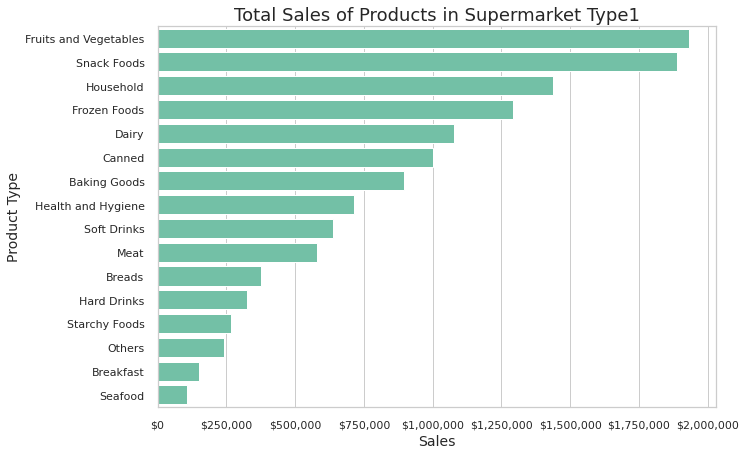

In [45]:
plt.figure(figsize=(10,7))
cum_sum_by_type1 = sale_sup1.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_by_type1['Item_Type'].sort_index(), x = cum_sum_by_type1['Sales By Product Type'], orient='h',color='mediumaquamarine')
ax.set_title('Total Sales of Products in Supermarket Type1', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k);

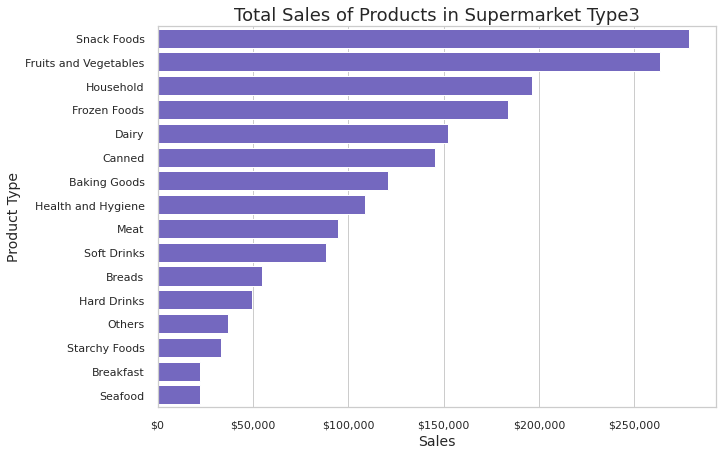

In [46]:
plt.figure(figsize=(10,7))
cum_sum_by_type2 = sale_sup2.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_by_type2['Item_Type'].sort_index(), x = cum_sum_by_type2['Sales By Product Type'], orient='h',color='slateblue');
ax.set_title('Total Sales of Products in Supermarket Type3', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k);

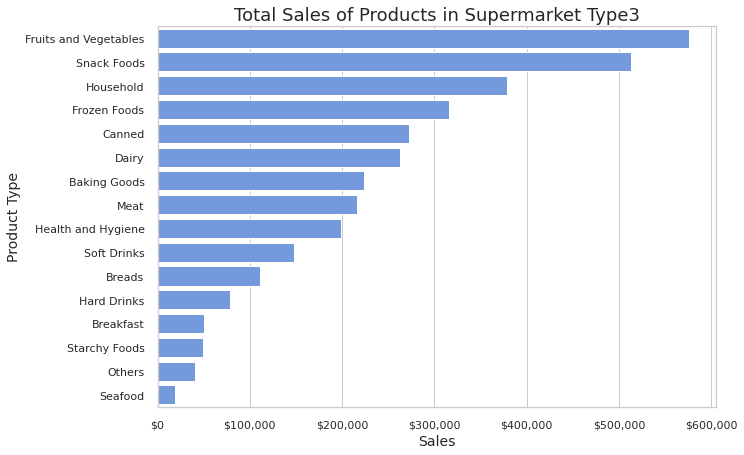

In [47]:
plt.figure(figsize=(10,7))
cum_sum_by_type3 = sale_sup3.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_by_type3['Item_Type'].sort_index(), x = cum_sum_by_type3['Sales By Product Type'], orient='h',color='cornflowerblue');
ax.set_title('Total Sales of Products in Supermarket Type3', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k);

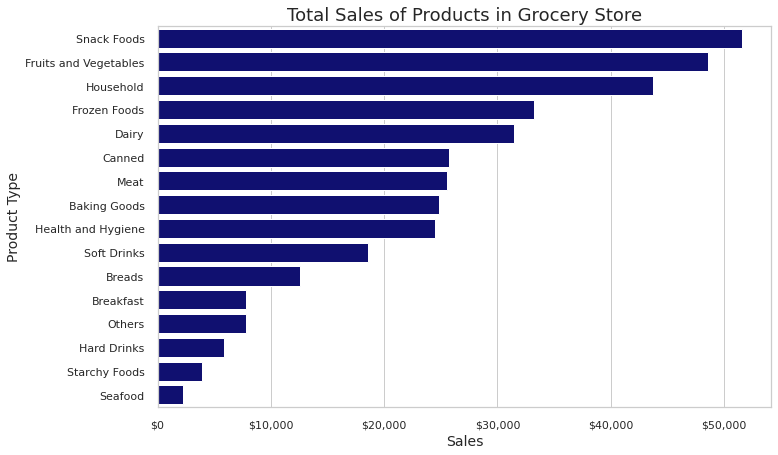

In [48]:
plt.figure(figsize=(11,7))
cum_sum_by_gros = sale_gros.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_by_gros['Item_Type'].sort_index(), x = cum_sum_by_gros['Sales By Product Type'], orient='h',color='navy');
ax.set_title('Total Sales of Products in Grocery Store', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k);

**Which category of stores has the highest total sales?**

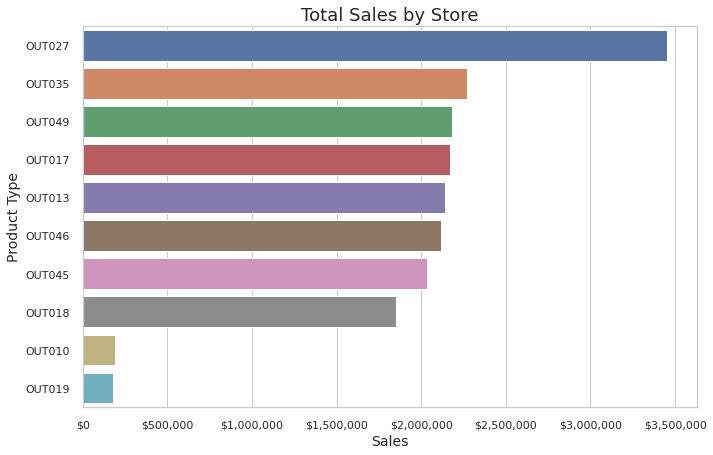

In [49]:
plt.figure(figsize=(11,7))
cum_sum_by_store = sales_predictions.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Store')
ax= sns.barplot(y = cum_sum_by_store['Outlet_Identifier'].sort_index(), x = cum_sum_by_store['Sales By Store'], orient='h');
ax.set_title('Total Sales by Store' , fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k)
plt.savefig('Total Sales by Store.png', dpi = 300);

* Store OUT027 has the highest sales among all the stores.

In [50]:
#make filter for store OUT027
best_store = sales_predictions[(sales_predictions['Outlet_Identifier']=='OUT027')]

**How sales in store OUT027 look like?**

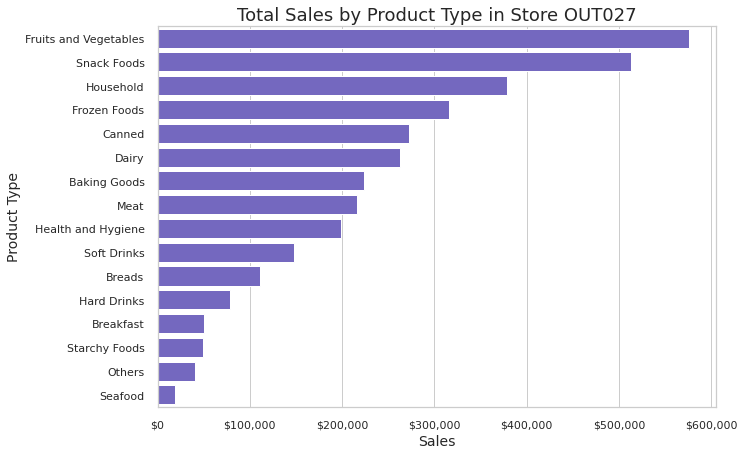

In [51]:
plt.figure(figsize=(10,7))
cum_sum_027 = best_store.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending=False).reset_index(name = 'Sales By Product Type')
ax= sns.barplot(y = cum_sum_027['Item_Type'].sort_index(), x = cum_sum_027['Sales By Product Type'], orient='h',color='slateblue');
ax.set_title('Total Sales by Product Type in Store OUT027', fontsize = 18)
ax.set_ylabel('Product Type', fontsize = 14)
ax.set_xlabel('Sales', fontsize = 14)
ax.xaxis.set_major_formatter(price_fmt_100k);

* Distribution of sales in store OUT027 looks mostly the same way as total sales across all stores

**Is there any difference in visibility of product categories in store OUT027 comparing to visibility  of product categories  in all stores?**

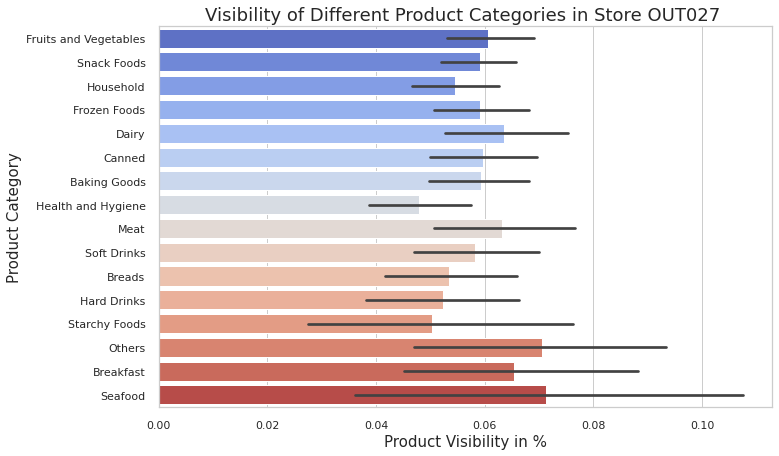

In [52]:
plt.figure(figsize=(11,7))
ax1=sns.barplot(x='Item_Visibility', y='Item_Type',data=best_store, orient='h',palette='coolwarm', 
                order=["Fruits and Vegetables","Snack Foods","Household","Frozen Foods","Dairy",
                       "Canned","Baking Goods","Health and Hygiene","Meat","Soft Drinks","Breads",
                       "Hard Drinks","Starchy Foods","Others","Breakfast","Seafood"])
ax1.set_xlabel('Product Visibility in %',fontsize=15)
ax1.set_ylabel('Product Category',fontsize=15)
ax1.set_title('Visibility of Different Product Categories in Store OUT027 ',fontsize=18)
fig.tight_layout()
plt.savefig('Visibility of Different Product Categories in Store OUT027.png', dpi = 300, bbox_inches='tight');

Yes, most of the product categories in store OUT027 have less visibility than average in all stores.

## Preprocessing for Machine Learning

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [54]:
filename = '/content/drive/MyDrive/Bootcamp/01 Week_ Python/sales_predictions.csv'
#check a head of a DataFrame
sales_predictions_ml = pd.read_csv(filename)
sales_predictions_ml.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [55]:
#rename inconsistent categories
repl_map ={'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}
sales_predictions_ml['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(repl_map)
sales_predictions_ml['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**Validation Split**

In [56]:
# split the data
X = sales_predictions_ml.drop(columns=['Item_Outlet_Sales','Item_Identifier'])
y = sales_predictions_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
sales_predictions_ml.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Instantiate Column Selectors**

In [58]:
# create selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

**Instantiate Transformers**

In [59]:
# create imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# scaler
scaler = StandardScaler()
# one-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

**Instantiate Pipelines**

In [60]:
# numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [61]:
# categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

**Instantiate ColumnTransformer**

In [62]:
# tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple,remainder="passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])

**Transform Data**

In [63]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])

In [64]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

**Inspect the Result**

In [65]:
# results in Numpy array
X_train_processed

array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

In [66]:
X_test_processed 

array([[ 0.33100885, -0.77664625, -0.99881554, ...,  1.        ,
         0.        ,  0.        ],
       [-1.17989246,  0.1003166 , -1.58519423, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.37844688, -0.48299432, -1.59578435, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-1.13957013,  1.21832428,  1.09397975, ...,  1.        ,
         0.        ,  0.        ],
       [-1.49772727, -0.77809567, -0.36679966, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.52076098, -0.77976293,  0.11221189, ...,  1.        ,
         0.        ,  0.        ]])

In [67]:
# check for missing values and shape
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




## Machine Learning Models

## Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
# put ColumnTransformer and linear regression model into a pipeline
lin_reg_pipe = make_pipeline(preprocessor, LinearRegression())

# fit pipe on the training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])),
                ('linearregression', LinearRegression())])

In [70]:
# make a function that takes true and predicted values as arguments
def eval_model(true, pred):
  """Takes true and predicted values (arrays) and prints  RMSE and R2"""
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)
  
  #print 2 metrics
  print(f'\nRMSE: {rmse:.3f},\nR^2: {r2:.3f} ')

In [71]:
#print results of Linear Regression 
print('Linear Regression Train Evaluation')
eval_model(y_train, lin_reg_pipe.predict(X_train))

print('\nLinear Regression Test Evaluation')
eval_model(y_test, lin_reg_pipe.predict(X_test))

Linear Regression Train Evaluation

RMSE: 1139.104,
R^2: 0.562 

Linear Regression Test Evaluation

RMSE: 1092.861,
R^2: 0.567 


## Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor

In [73]:
# put ColumnTransformer and decision tree regression model into a pipeline
dec_tree_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42))

# fit pipe on the training data
dec_tree_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [74]:
#print results of Decision Tree Regression 
print('Decision Tree Train Evaluation')
eval_model(y_train, dec_tree_pipe.predict(X_train))

print('\nDecision Tree Test Evaluation')
eval_model(y_test, dec_tree_pipe.predict(X_test))

Decision Tree Train Evaluation

RMSE: 0.000,
R^2: 1.000 

Decision Tree Test Evaluation

RMSE: 1500.358,
R^2: 0.184 


In [75]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_processed,y_train)

DecisionTreeRegressor(random_state=42)

In [76]:
#check depth of Decision Tree
dec_tree.get_depth()

40

In [77]:
# list of values to try for max_depth:
max_depth_range = list(range(2, 40)) # will try every value between 2 and 40
# list to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

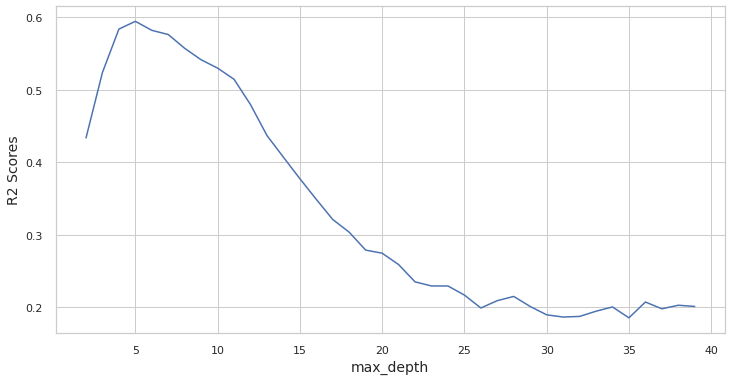

In [78]:
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth', fontsize=14)
plt.ylabel('R2 Scores', fontsize=14);

* From graph we can see that optimized depth is 5

In [79]:
# run new pipe with our optimized value for max_depth

# put ColumnTransformer and Decision Tree regression model into a pipeline
dec_tree_pipe_depth_5 = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=42,max_depth = 5))

# fit pipe on the training data
dec_tree_pipe_depth_5.fit(X_train, y_train)

#print results of Decision Tree Regression with depth=5
print('Decision Tree (depth=5) Train Evaluation')
eval_model(y_train, dec_tree_pipe_depth_5.predict(X_train))

print('\nDecision Tree (depth=5) Test Evaluation')
eval_model(y_test, dec_tree_pipe_depth_5.predict(X_test)) 


Decision Tree (depth=5) Train Evaluation

RMSE: 1082.646,
R^2: 0.604 

Decision Tree (depth=5) Test Evaluation

RMSE: 1057.443,
R^2: 0.595 


* We have better results with our defined depth.

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
# put ColumnTransformer and randon forest regression model into a pipeline
rf_pipe = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))

# fit pipe on the training data
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [82]:
#print results of Random Forest Regression 
print('Random Forest Train Evaluation')
eval_model(y_train, rf_pipe.predict(X_train))

print('\nRandom Forest Test Evaluation')
eval_model(y_test, rf_pipe.predict(X_test)) 

Random Forest Train Evaluation

RMSE: 427.626,
R^2: 0.938 

Random Forest Test Evaluation

RMSE: 1102.082,
R^2: 0.560 


In [83]:
#create a range of max_depth values
depths = range(1, 20, 2)

r2_train = []
r2_test = []
#loop over the values in depths
for n in depths:
  #Trying depth. Printing depth = n
  #fit a new model with max_depth=n
  rf_2 = RandomForestRegressor(max_depth=n, random_state=42)

  #put the model into a pipeline
  rf_2_pipe = make_pipeline(preprocessor, rf_2)
  
  #fit the model
  rf_2_pipe.fit(X_train, y_train)
  
  #create prediction arrays
  train_pred = rf_2_pipe.predict(X_train)
  test_pred = rf_2_pipe.predict(X_test)
  
  #evaluate the model using R2 Score
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)
  r2_train.append(train_r2score)
  r2_test.append(test_r2score)

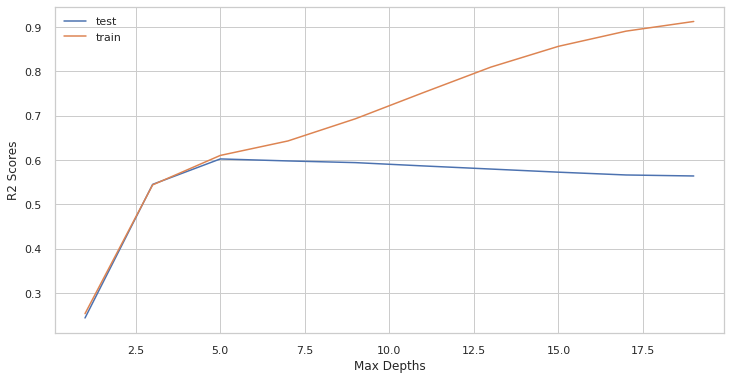

In [84]:
plt.plot(depths, r2_test, label = 'test')
plt.plot(depths, r2_train, label = 'train')
plt.ylabel('R2 Scores')
plt.xlabel('Max Depths')
plt.legend();

In [85]:
# make a ColumnTransformer and randon forest regression model into a pipeline with depth 5
rf_pipe_5 = make_pipeline(preprocessor, RandomForestRegressor(random_state=42, max_depth = 5))

# fit pipe on the training data
rf_pipe_5.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9bfd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7b93d9ba10>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [86]:
#print results of Random Forest Regression  with depth=5
print('Random Forest Train Evaluation')
eval_model(y_train, rf_pipe_5.predict(X_train))

print('\nRandom Forest Test Evaluation')
eval_model(y_test, rf_pipe_5.predict(X_test)) 

Random Forest Train Evaluation

RMSE: 1073.594,
R^2: 0.611 

Random Forest Test Evaluation

RMSE: 1047.069,
R^2: 0.603 


* **After using several Maching Learning models we can tell that the best result we get with Random Forest Model (scors for train r^2 = 0.61 and test r^2 = 0.60). However this results are still low to be able to make a good predictions on our product sales.**  